<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(256, 256)


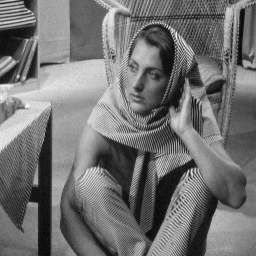

In [48]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/barbara.jpg", 0) 
img = cv2.resize(img, (256, 256), interpolation= cv2.INTER_LINEAR)
print(img.shape)
cv2_imshow(img)

In [57]:
def DFT_1D(fx):
    fx = np.asarray(fx, dtype=complex)
    M = fx.shape[0]
    fu = fx.copy()

    for i in range(M):
        u = i
        sum = 0
        for j in range(M):
            x = j
            tmp = fx[x]*np.exp(-2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        # print(sum)
        fu[u] = sum
    # print(fu)

    return fu


def DFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = DFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = DFT_1D(fx[:, i])


    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = DFT_2D(fu[:, :, ch])

    #fx = np.real(fx)
    return fx

In [50]:
def inverseDFT_1D(fu):
    fu = np.asarray(fu, dtype=complex)
    M = fu.shape[0]
    fx = np.zeros(M, dtype=complex)

    for i in range(M):
        x = i
        sum = 0
        for j in range(M):
            u = j
            tmp = fu[u]*np.exp(2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        fx[x] = np.divide(sum, M, dtype=complex)

    return fx

def inverseDFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = inverseDFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = inverseDFT_1D(fx[:, i])

    elif len(fu.shape) == 3:
        for ch in range(3):
            fx[:, :, ch] = inverseDFT_2D(fu[:, :, ch])


    #fx = np.real(fx)
    return fx

In [58]:
fx = DFT_2D(img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


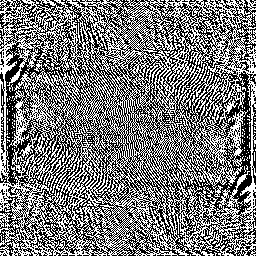

In [59]:
cv2_imshow(fx)

In [60]:
def shift(F):
    ''' this shifts the centre of FFT of images/2-d signals'''
    M, N = F.shape[:2]
    R1, R2 = F[0: M//2, 0: N//2], F[M//2: M, 0: N//2]
    R3, R4 = F[0: M//2, N//2: N], F[M//2: M, N//2: N]
    print(R1.shape, R2.shape, R3.shape, R4.shape)
    sF = np.zeros(F.shape,dtype = F.dtype)
    sF[M//2: M, N//2: N], sF[0: M//2, 0: N//2] = R1, R4
    sF[M//2: M, 0: N//2], sF[0: M//2, N//2: N]= R3, R2
    return sF

In [61]:
sF = shift(fx)

(128, 128) (128, 128) (128, 128) (128, 128)


In [62]:
print(sF)

[[-1175.        -1.01668736e-10j   923.81613736-1.57038707e+03j
   -764.02554177+1.56951637e+03j ...   452.53882982+1.70114782e+03j
   -764.02554177-1.56951637e+03j   923.81613736+1.57038707e+03j]
 [ -464.18891508+3.32399652e+02j    50.13912978-1.53367252e+02j
   -138.68544165-9.27488621e+02j ...  -363.5930991 +5.54697745e+02j
   -293.6625709 -2.48363985e+02j   389.82327412-1.96183302e+02j]
 [ -304.27088191+1.59130907e+03j  1254.2259983 -2.10562979e+03j
  -1543.97844418+2.49712649e+03j ...   250.37464043+1.98744427e+02j
    755.81827572+8.25571073e+02j   -87.38670175-1.36181718e+03j]
 ...
 [ -848.43624436+1.29854408e+03j   963.18224983-4.07375685e+02j
  -1064.37959167-2.59653562e+02j ...  1260.30673456-1.06793128e+03j
   -978.60630388+2.02851320e+03j  1132.30445049-1.94998651e+03j]
 [ -304.27088191-1.59130907e+03j   -87.38670175+1.36181718e+03j
    755.81827572-8.25571073e+02j ...  1004.67392138+1.16278457e+03j
  -1543.97844418-2.49712649e+03j  1254.2259983 +2.10562979e+03j]
 [ -464.18

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


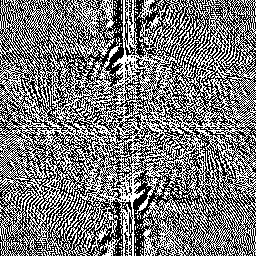

In [63]:
cv2_imshow(sF)

In [66]:
sF.shape

(256, 256)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


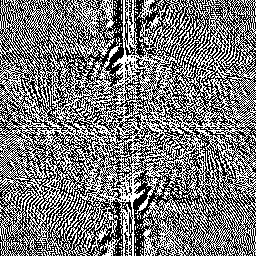

In [65]:
dft_shift = np.fft.fftshift(fx)
cv2_imshow(dft_shift)

In [76]:
rows, cols = img.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

In [77]:
mask.shape

(256, 256)

In [78]:
fshift = sF * mask

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


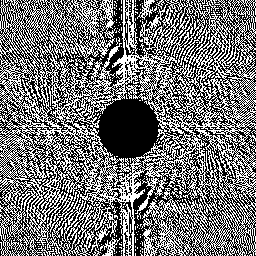

In [79]:
cv2_imshow(fshift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


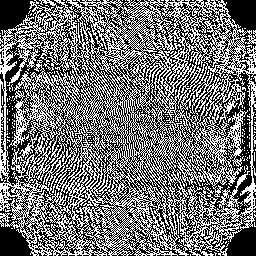

In [80]:
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)

In [81]:
imgg = inverseDFT_2D(f_ishift)

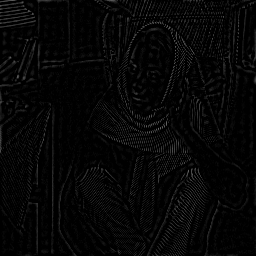

In [82]:
cv2_imshow(imgg)

In [83]:
rows, cols = img.shape[:2]
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


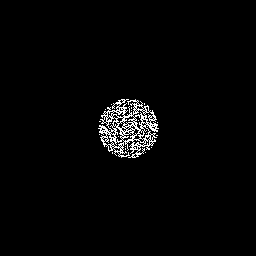

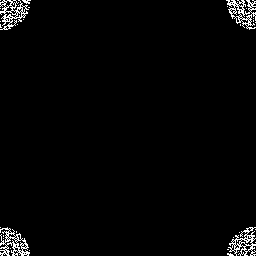

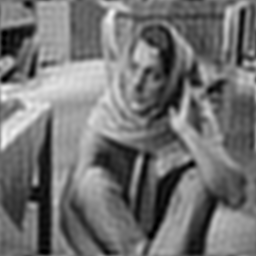

In [84]:
fshift = sF * mask
cv2_imshow(fshift)
f_ishift = np.fft.ifftshift(fshift)
cv2_imshow(f_ishift)
imgg = inverseDFT_2D(f_ishift)
cv2_imshow(imgg)